# Perform a meta-analysis

The replication and update of the meta-analysis is performed thanks to a Python Package. All values required to perform the meta-analysis are stored in a csv file. All csv files used in *Bussalb et al.* are available:
1. for the replication with our choices: 
   * *values_total_meta_analysis_cortese.csv*, 
   * *values_inattention_meta_analysis_cortese.csv*, 
   * *values_hyperactivity_meta_analysis_cortese.csv*;
2. for the update: 
   * *values_total_meta_analysis.csv*, 
   * *values_inattention_meta_analysis.csv*, 
   * *values_hyperactivity_meta_analysis.csv*;
3. for the subgroup analysis: 
   * standard protocol: 
     * *values_total_meta_analysis_sd.csv*, 
     * *values_inattention_meta_analysis_sd.csv*, 
     * *values_hyperactivity_meta_analysis_sd.csv*;   
   * low/no medication: 
     * *values_total_meta_analysis_wm.csv*, 
     * *values_inattention_meta_analysis_wm.csv*,
     * *values_hyperactivity_meta_analysis_wm.csv*.

Meta-analysis can be run for three outcomes: total, inattention and hyperactivity.

## Import raw data

The name of the csv file to import must be modified according to the outcome we want to study. If you had not installed the ```source_assess_treatment_efficacy``` package (see ```README.md```), do not forget to uncomment and change the path given in ```sys.path.append``` (it corresponds to the root path, where the ```source_assess_treatment_efficacy``` package is) and make sure to fulfill the requirements specified in ```requirements.txt```.

In [1]:
import numpy as np
import scipy.stats as scp
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.display import display
import sys

# Add the path where the packages are
# sys.path.append(r"C:\Users\Aurore Bussalb\Desktop\github_repo\meta-analysis-statistical-tools")
import source_assess_treatment_efficacy.meta_analysis.import_csv_for_meta_analysis as icm
import source_assess_treatment_efficacy.meta_analysis.perform_meta_analysis as pma

%matplotlib inline

# Import data from a csv file
df_parents, df_teachers, df_clinicians = icm.import_csv(r"data-update\values_total_meta_analysis.csv")

## Run the meta-analysis

If you want to run the meta-analysis on parents assessments put ```df_parents``` as ```run_meta_analysis``` first argument, otherwise put ```df_teachers```. For more information, see the documentation of that module in ```documentation\package-documentation```.

In [2]:
# Results per study
df_results_per_study, df_results, ES = pma.run_meta_analysis(df_teachers)
display(df_results_per_study)

,Year,Effect size,Standard Error of the ES,95% Confidence interval of the ES,Weight
Author,,,,,
Bakhshayesh,2011.0,-0.407214,0.363946,"(-1.1205483262221743, 0.3061198628742419)",6.933568
Christiansen,2014.0,-0.178099,0.382138,"(-0.9270897965984559, 0.5708923318612351)",6.289114
Gevenlesben,2009.0,-0.421533,0.224679,"(-0.8619049989069667, 0.018838184952962467)",18.192993
Maurizio,2014.0,0.104359,0.420186,"(-0.7192056925981264, 0.9279227788974002)",5.201730
VanDongen,2013.0,0.145072,0.323304,"(-0.4886041657194486, 0.778748857059959)",8.786330
Steiner2014,2014.0,-0.055172,0.242930,"(-0.5313143834237865, 0.42096973209662486)",15.562152
Steiner,2011.0,0.263350,0.485738,"(-0.6886976109738673, 1.2153972148609404)",3.892473
Arnold,2013.0,0.334916,0.358312,"(-0.367376405402032, 1.037207491729418)",7.153315
Strelh,2017.0,-0.118609,0.181145,"(-0.47365371705619513, 0.2364354967116003)",27.988325


The effect size between subject is computed for each study as long with its standard error and its 95% confidence interval. The weight associated to each study is displayed too. A negative effect size is in favor of Neurofeedback.

In [3]:
# Results of the meta-analysis
display(df_results)

,Chi2,p-value Heterogeneity,Tau2,Summary Effect,Variance Summary Effect,Standard Error Summary Effect,95% Confidence Interval of the Summary Effect,p-value,Heterogeneity
Results,5.687551,0.682184,0,-0.105524,0.009184,0.095833,"(-0.29335696042388404, 0.08230858712586096)",0.270842,0


Results of the meta-analysis are presented here. A negative summar effect is in favor of Neurofeedback.

## Display the forest plot

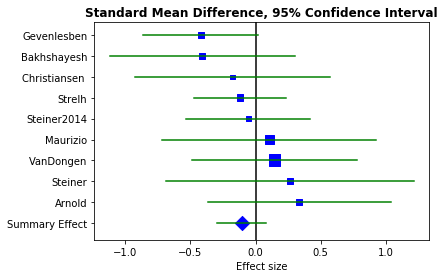

In [4]:
forest_plot = pma.forest_plot(df_results_per_study, df_results)

Negative effect sizes are in favor of Neurofeedback.